In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def lda_fit(X, y, n_components):
    """
    X: numpy.ndarray, (n_samples, n_features)
    y: numpy.ndarray, (n_samples,)
    n_components: int, количество компонент для проекции
    """
    
    # Получение уникальных классов
    class_labels = np.unique(y)
    
    # Вычисление общего среднего
    mean_overall = np.mean(X, axis=0)
    
    # Инициализация списков для хранения разбросов
    S_w = np.zeros_like(X[0])
    S_b = np.zeros_like(X[0])
    
    # Вычисление разбросов
    for label in class_labels:
        # Данные для текущего класса
        X_class = X[y == label]
        mean_class = np.mean(X_class, axis=0)
        
        # SW: Разброс внутри класса
        S_w += np.sum((X_class - mean_class) ** 2, axis=0)
        
        # SB: Разброс между классами
        n_class_samples = X_class.shape[0]
        S_b += n_class_samples * (mean_class - mean_overall) ** 2
    
    # "Собственные значения" — отношение разброса между и внутри классов
    lda_direction = S_b / (S_w + 1e-10)  # Добавляем малое значение, чтобы избежать деления на 0

    # # Сортируем направления по важности (убыванию значений SB/SW)
    lda_direction = np.argsort(lda_direction)[::-1]
    
    return lda_direction

def lda_transform(X, lda_direction, n_components=2):

    # Берём первые n_components направлений
    selected_features = lda_direction[:n_components]
    return X[:, selected_features]

In [9]:
data = load_iris()
X = data.data
y = data.target

lda_direction = lda_fit(X, y, n_components=2)
X_reduced = lda_transform(X, lda_direction, n_components=2)

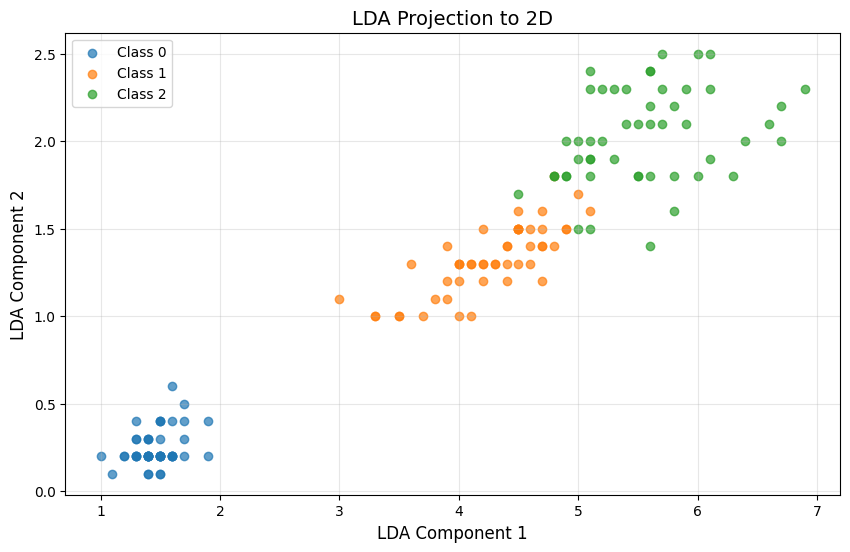

In [10]:
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=f'Class {label}', alpha=0.7)

plt.title('LDA Projection to 2D', fontsize=14)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('LDA Component 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

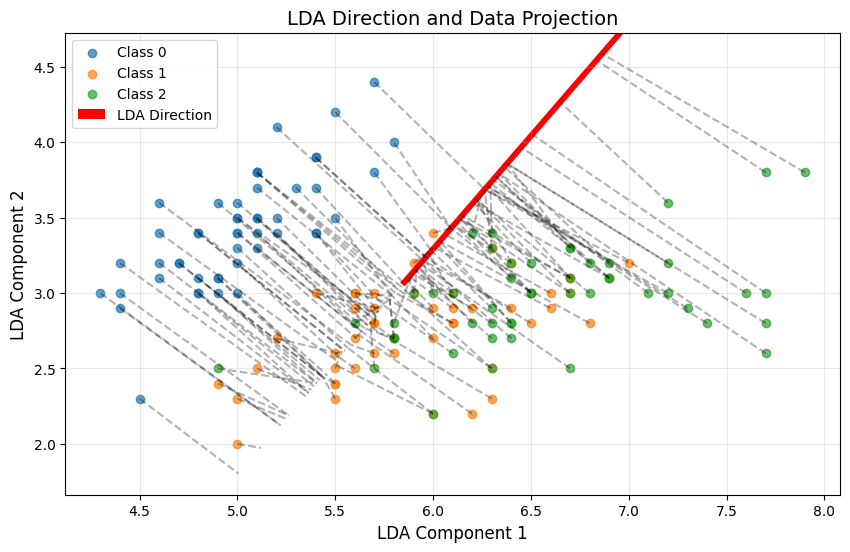

In [11]:
# Визуализация
plt.figure(figsize=(10, 6))

# Оригинальные данные
for cls in np.unique(y):
    plt.scatter(X[y == cls, 0], X[y == cls, 1], label=f'Class {cls}', alpha=0.7)

# Направление LDA
origin = np.mean(X, axis=0)  # Центральная точка
scale = 4  # Масштаб для отображения направления
plt.quiver(
    origin[0], origin[1], 
    lda_direction[0], lda_direction[1], 
    angles='xy', scale_units='xy', scale=1, color='r', label='LDA Direction'
)

# Проекция точек на направление
for i in range(X.shape[0]):
    proj_length = np.dot((X[i] - origin), lda_direction) / np.linalg.norm(lda_direction)
    proj_point = origin + proj_length * lda_direction / np.linalg.norm(lda_direction)
    plt.plot([X[i, 0], proj_point[0]], [X[i, 1], proj_point[1]], 'k--', alpha=0.3)

plt.title('LDA Direction and Data Projection', fontsize=14)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('LDA Component 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
